<a href="https://colab.research.google.com/github/Manojpatil123/self-project-EDA-on-cricket-data-set/blob/main/Self_Project_Solution_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gradient Descent for Optimization

In [ ]:
# Matrix computations
from numpy import *

# Plotting
from matplotlib.pyplot import *
import matplotlib.pyplot as plt

# Change size of figures
fig_size = [9,7]
rcParams["figure.figsize"] = fig_size

## Minimizing multiple variable function

Let us consider the following straight forward bivariate function $$f(x,y) = x^2 + y^2 + 1.$$ Since this a function of two variables, we have have the following partial derivatives $$\frac{df(x)}{dx} = f_{x} = 2x \text{ and } \frac{df(y)}{dy} = f_{y} = 2y.$$ Note that its easy to argue that the global minimum of $f(x,y)$ is (0,0) since $f(0,0) = 1$ and $f(x,y) \ge 1.$


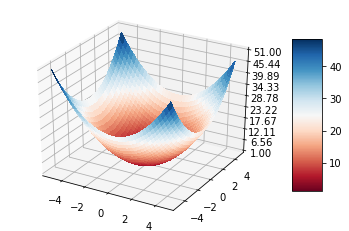

In [ ]:
# Plotting in 3D
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

# f(x,y) = x^2 + y^2 + 1
def f(x,y):
    return x**2 + y**2 + 1
     
# (X,Y) grid on [-5,5]
x = arange(-5, 5, 0.25)
y = arange(-5, 5, 0.25)
X, Y = meshgrid(x, y)


# z = x^2 + y^2
Z = f(X,Y)

# Plot (X,Y) in 3D
fig = figure(1)
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.RdBu,linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
fig.colorbar(surf, shrink = 0.7, aspect=5)
show()    

### Finding global minimum using gradient descent

For this example the gradient descent algorithm is simplified to

$$
\begin{bmatrix}
    x^{t+1} \\ 
    y^{t+1}
\end{bmatrix}
=
\begin{bmatrix}
    x^{t} \\ 
    y^{t}
\end{bmatrix}
-
\lambda
\begin{bmatrix}
    2x^{t} \\ 
    2y^{t} \\ 
\end{bmatrix},
$$

where $t$ is the gradient descent iteration. 

In [ ]:
#partial derivative of f(x) w.r.t x
def derivativewrtx(x):
  return 2*x

In [ ]:
#partial derivative of f(x) w.r.t y
def derivativewrty(y):
  return 2*y

In [ ]:
# Your code here# Gradient Descent 
def grad_descent(derivativewrtx,derivativewrty,x_prev,y_prev,learning_rate):

  # Deciding when to stop the algorithm
  epsilon = 0.001

  # Iteration number
  grad_iter = 1

  # Gradient descent update step
  x_next = x_prev - learning_rate*derivativewrtx(x_prev)
  y_next = y_prev - learning_rate*derivativewrty(y_prev)

  # Update the sequencex,sequencey where we store all the x_next and y_next
  sequencex = np.array([])
  sequencex = np.append(sequencex,x_next)
  sequencey = np.array([])
  sequencey = np.append(sequencey,y_next)

  # Start my iteration 
  while np.sqrt((x_next-x_prev)**2 + (y_next-y_prev)**2) > epsilon :

    # Setting x_prev to x_next
    x_prev = x_next

    # Setting y_prev to y_next
    y_prev = y_next

    # Updating x_next 
    x_next = x_prev - learning_rate*derivativewrtx(x_prev)
    # Updating y_next
    y_next = y_prev - learning_rate*derivativewrty(y_prev)

    # Update sequencex and sequencey
    sequencex = np.append(sequencex,x_next)
    sequencey = np.append(sequencey,y_next)

    # Update iteration
    grad_iter = grad_iter + 1


  return x_next,y_next,sequencex,sequencey,grad_iter







In [ ]:
#plotting function for f(x) and convergence points
def plotf(x,y,xdots,ydots,label):

  # Change size of figures
  fig_size = [15,12]
  rcParams["figure.figsize"] = fig_size
    
  X, Y = meshgrid(x, y)


  # z = x^2 + y^2
  Z = f(X,Y)

  # Plot (X,Y) in 3D
  fig = figure(1)
  ax = fig.gca(projection='3d')
  surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.RdBu,linewidth=0, antialiased=False)

  #finding z for x_dot and y_dot
  z=f(x_dot,y_dot)

  #Plotting convergence points.
  ax.plot3D(x_dot,y_dot,z,c='g',marker='o',markerfacecolor='blue',markersize=6)
  plt.title(label)

  ax.zaxis.set_major_locator(LinearLocator(10))
  ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
  fig.colorbar(surf, shrink = 0.7, aspect=5)
  show() 

In [ ]:
grad_output = grad_descent(derivativewrtx,derivativewrty,5,5,0.2)
#storing x and y sequence respectively 
x_dot=grad_output[2]
y_dot=grad_output[3]
xy=list(zip(x_dot,y_dot))
print('global minima point = '+'{:.2f}'.format(grad_output[0]) + ',{:.2f}'.format(grad_output[1]))
print('x,y coordinates')
xy

global minima point = 0.00,0.00
x,y coordinates


[(3.0, 3.0),
 (1.7999999999999998, 1.7999999999999998),
 (1.0799999999999998, 1.0799999999999998),
 (0.6479999999999999, 0.6479999999999999),
 (0.3887999999999999, 0.3887999999999999),
 (0.23327999999999993, 0.23327999999999993),
 (0.13996799999999995, 0.13996799999999995),
 (0.08398079999999997, 0.08398079999999997),
 (0.05038847999999998, 0.05038847999999998),
 (0.030233087999999984, 0.030233087999999984),
 (0.018139852799999988, 0.018139852799999988),
 (0.010883911679999993, 0.010883911679999993),
 (0.006530347007999996, 0.006530347007999996),
 (0.0039182082047999976, 0.0039182082047999976),
 (0.0023509249228799984, 0.0023509249228799984),
 (0.001410554953727999, 0.001410554953727999),
 (0.0008463329722367994, 0.0008463329722367994)]

In [ ]:
print('total number of iteration= ',grad_output[4])

('total number of iteration= ', 17)


#Plotting the above defined gradient descent for optimization

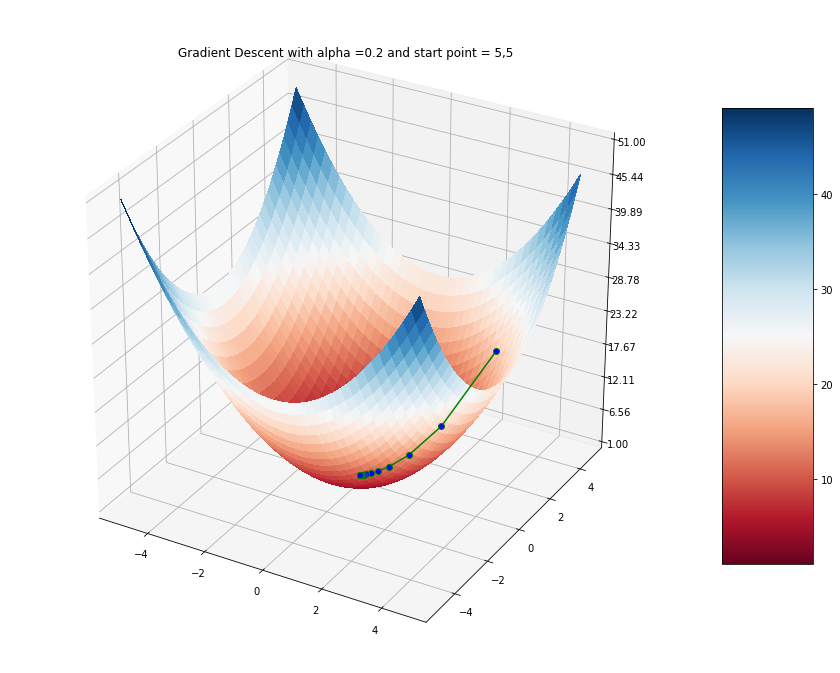

In [ ]:
  # (X,Y) grid on [-5,5]
  x = arange(-5, 5, 0.25)
  y = arange(-5, 5, 0.25)

  plotf(x,y,x_dot,y_dot,"Gradient Descent with alpha =0.2 and start point = 5,5")

# **Using high learning rate**

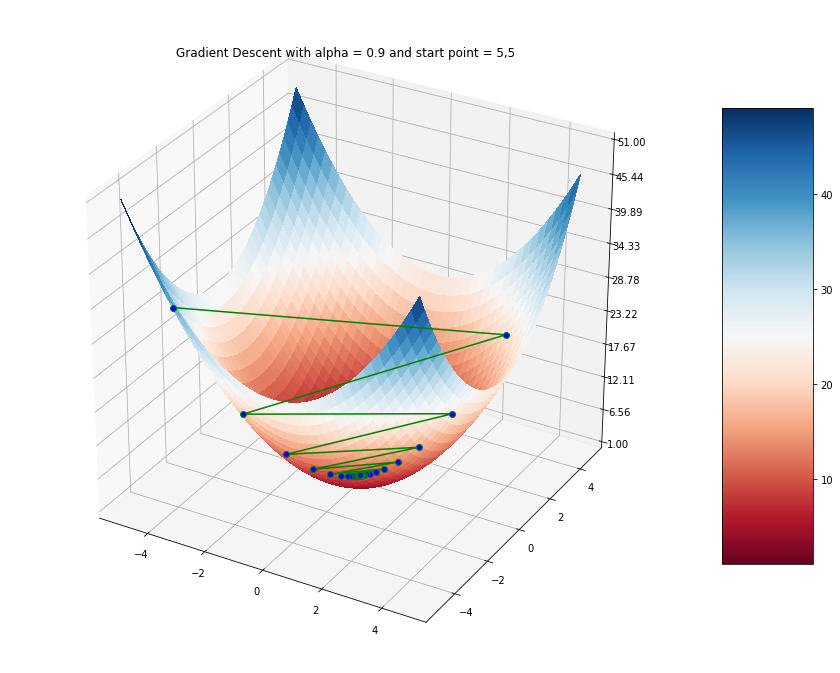

In [ ]:
grad_output = grad_descent(derivativewrtx,derivativewrty,5,5,0.9)
x_dot=grad_output[2]
y_dot=grad_output[3]
plotf(x,y,x_dot,y_dot,"Gradient Descent with alpha = 0.9 and start point = 5,5")

#**Using very small learning rate**

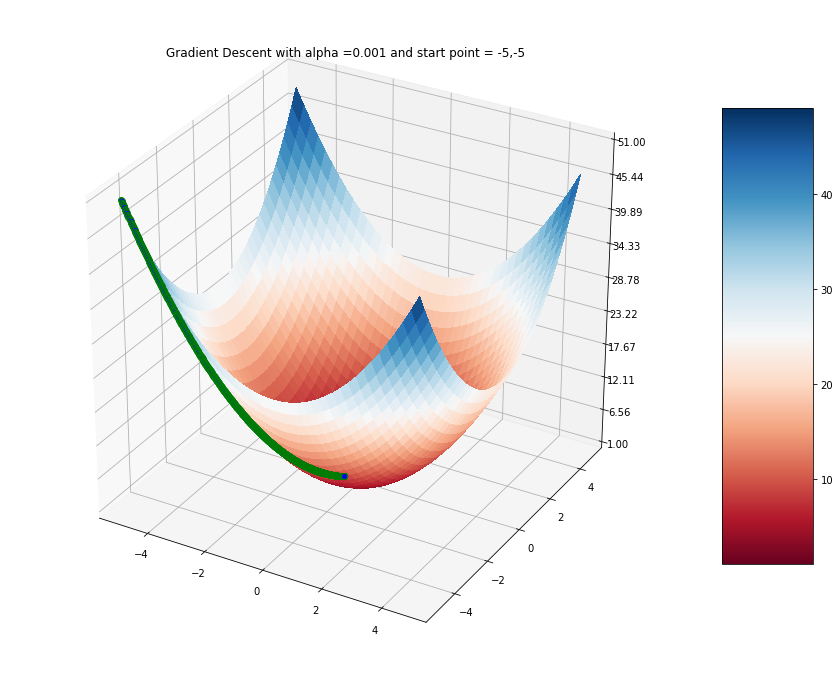

In [ ]:
grad_output = grad_descent(derivativewrtx,derivativewrty,-5,-5,0.001)
x_dot=grad_output[2]
y_dot=grad_output[3]
plotf(x,y,x_dot,y_dot,"Gradient Descent with alpha =0.001 and start point = -5,-5")

In [ ]:
print('Total number of iteration=',grad_output[4])

('Total number of iteration=', 1325)


As we can observe the number of iteration are 1325 for very small learning rate 

#  <b><u>Conclusion</u></b>

### Gradient descent is a first order (requires first derivative) optimization algorithm used to minimize a given objective function. The algorithm depends on the initial value and the learning rate. The idea behind gradient descent is that it takes a seqeuence of steps to go from the starting position to a local minimum. An initial value that is somewhat close to the global minimum is ideal. Too small a learning rate makes it more likely for the algorithm to get stuck at a local minimum. Whereas too high a learning rate makes it more likely that the algorithm will skip over the global minimum. As we discussed in this notebook, the gradient descent can be applied to any first differentiable function (single or multiple variabe) to approximate the minimums (can be local minimums) even if analytical ($f'(x) = 0$ solve for x) solutions are difficult.

# ***Global minima for $$f(x,y) = x^2 + y^2 + 1.$$ is at (0,0)***